In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32 #storing 32 images
CHANNELS = 3 #RGB CHANNEL
EPOCHS=50 

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset) #Every element in the dataset is a batch of 32 images, 2152/32 Ceiling Function

68

In [6]:
for image_batch, label_batch in dataset.take(1):#takes 1 batch
    print(image_batch.shape)
    print(label_batch.numpy()) #label_batch gives you tensor, which is converted to numpy
#label batch is title which gives tensor
#32,256,256,3 (3 refers to RGB Channels)
#0,1,2 corresponds to classes

(32, 256, 256, 3)
[1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 2 0 2 1 0 0 1]


In [7]:
for image_batch, label_batch in dataset.take(1):
    # print(image_batch[0]) #printing 1st image, this is tensor
    print(image_batch[0].numpy()) #printing 1st image, tensor converted to numpy
#Every color is b/w 0-255, and so are the numbers printed in this array

[[[135. 133. 146.]
  [146. 144. 157.]
  [158. 156. 169.]
  ...
  [185. 189. 200.]
  [181. 185. 196.]
  [175. 179. 190.]]

 [[148. 146. 159.]
  [151. 149. 162.]
  [156. 154. 167.]
  ...
  [181. 185. 196.]
  [176. 180. 191.]
  [169. 173. 184.]]

 [[157. 155. 168.]
  [151. 149. 162.]
  [149. 147. 160.]
  ...
  [179. 183. 194.]
  [173. 177. 188.]
  [166. 170. 181.]]

 ...

 [[129. 126. 137.]
  [110. 107. 118.]
  [109. 106. 117.]
  ...
  [141. 139. 150.]
  [141. 139. 150.]
  [138. 136. 147.]]

 [[122. 119. 130.]
  [109. 106. 117.]
  [109. 106. 117.]
  ...
  [142. 140. 151.]
  [145. 143. 154.]
  [144. 142. 153.]]

 [[117. 114. 125.]
  [123. 120. 131.]
  [122. 119. 130.]
  ...
  [135. 133. 144.]
  [143. 141. 152.]
  [146. 144. 155.]]]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape) #printing shape of 1st image

(256, 256, 3)


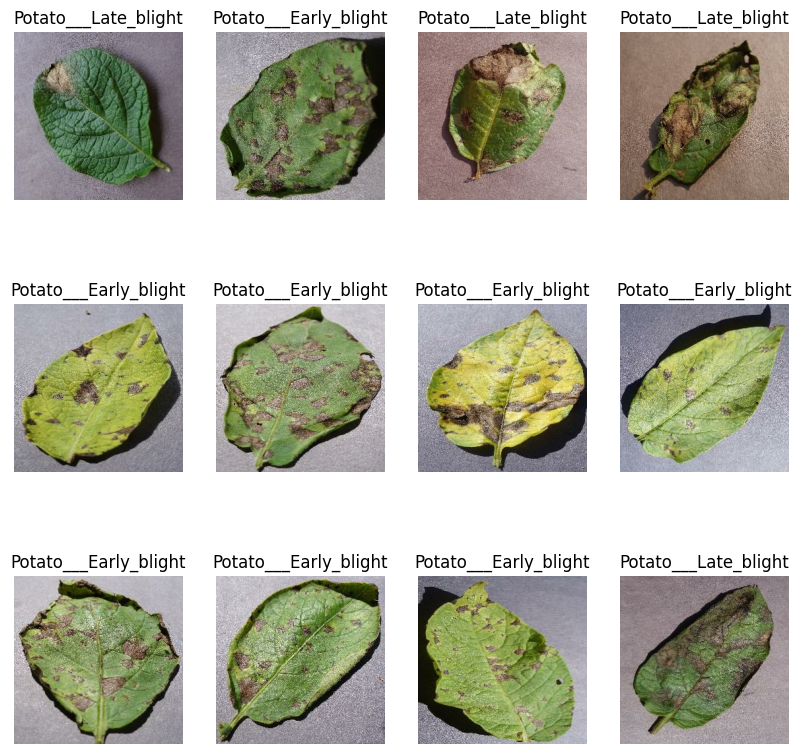

In [9]:
#visualising an image
plt.figure(figsize=(10,10)) #area of each image
for image_batch, label_batch in dataset.take(1): #take(1) means 1st batch of 32 images
    for i in range(12):
        ax = plt.subplot(3,4,i+1) #required otherwise only 1 image will show
        plt.imshow(image_batch[i].numpy().astype("uint8")) #this expects 3d array
        plt.title(class_names[label_batch[i]]) #displaying label
        plt.axis("off") #i dont want numbers on x-y axis
#.astype("uint8") converts the float into integer, which is necessary to show proper image
#i want to display label (which image is it)

In [10]:
len(dataset)

68

In [11]:
#Dividing dataset
80% ==> training #80% for training dataset
20% ==> 10% validation, 10% test #10% will be used to validate the training model
#after each epoch, you do validation on each 10%
#after 50 epochs, then 10% final test data is used to measure accuracy and other metrics

SyntaxError: invalid syntax (1644495376.py, line 2)

In [ ]:
#sklearn used to split
train_size = 0.8
len(dataset)*train_size
# dataset.take(10) #will take 1st 10 samples
# i.e. 54 batches could be used as train dataset

In [ ]:
train_ds = dataset.take(54) #first 54, arr[:54]
len(train_ds)

In [ ]:
test_ds = dataset.skip(54) #take from 54 onwards, arr[54:]
#IT Is not test dataset
len(test_ds)

In [ ]:
val_size = 0.1 #validation size
len(dataset)*val_size #10% of dataset is 6 samples

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

In [ ]:
test_ds = test_ds.skip(6) #THIS is the actual test dataset
len(test_ds)

In [ ]:
#Validation, Test, Train datasets are splitted now
#val_ds, test_ds, train_ds

In [ ]:
#function to take tensorflow dataset, split ratio, shufflesize
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)#seed could be any number, it used for checking Predictibility
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

In [ ]:
len(val_ds)

In [ ]:
len(test_ds)

In [ ]:
#Basically training will run fast
#Saving time for loading images
#Caching and Prefetching dataset
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#prefetch(buf.....: While Gpu is training
#cache will read an image from disc, and when you need that image for next iteration, it will keep it in its memory, which improves the performance of pipeline
#prefetch: if gpu is busy training, prefetch will load next set of batch from disc, which will improve performance

In [ ]:
#Preprocessing
#scaling to get 0-1
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])
#data augmentation: An image with rotation/contrast, etc. might not work properly
#1 original image, get 4 new training samples (flip, contrast, rotation , zoom) and use all these to train, to make model more robust

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE)
#Using Convulational Neural Network to be used for Image classification
model = models.Sequentioal([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape), #Gpogle TESNORFLOW COV2D Layer
    #filters are sub-parameters used for detection (eye, nose, ears, hands)
    #In our case, we will be using 32 layers, 32 came from trial and error
    #(3,3) will be filter size
    #activation Layer popular one is relu (fast to compute)
    #kernelsize is size of filter
    #After Convulational layer, you have Pooling Layer
    layers.MaxPooling2D((2,2)), #4*4 matrix reduced to 2*2, by selectively choosing max value of 2*2 matrices parts in 4*4 matrix
    #It is done to preserving the features and reducing the size
    
])